# CS145 Introduction to Data Mining - Assignment 3
## Deadline: 11:59PM (midnight), April 28, 2024

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, and GitHub repositories.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

## Before You Start

Useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

**Appendix**

Here, we give some background on convexity which you may find useful for some of the questions in this assignment. You may assume anything given here.

Convexity is an important concept in mathematics with many uses in machine learning. We briefly define convex set and function and some of their properties here. Using these properties are useful in solving some of the questions in the rest of this homework. If you are interested to know more about convexity, refer to Boyd and Vandenberghe, Convex Optimization, 2004.

A set $C$ is convex if the line segment between any two points in $C$ lies within $C$, i.e., if for any $x_1, x_2 \in C$ and for any $0 \leq \lambda \leq 1$, we have
$$
\lambda x_1+(1-\lambda) x_2 \in C .
$$

For example, a cube or sphere in $\mathbb{R}^d$ are convex sets, but a cross (a shape like $\mathrm{X}$ ) is not.
A function $f: \mathbb{R}^d \rightarrow \mathbb{R}$ is convex if its domain is a convex set and if for all $x_1, x_2$ in its domain, and for any $0 \leq \lambda \leq 1$, we have
$$
f\left(\lambda x_1+(1-\lambda) x_2\right) \leq \lambda f\left(x_1\right)+(1-\lambda) f\left(x_2\right) .
$$

This inequality means that the line segment between $\left(x_1, f\left(x_1\right)\right)$ and $\left(x_2, f\left(x_2\right)\right)$ lies above the graph of $f$. A convex function looks like $\smile$. We say that $f$ is concave if $-f$ is convex. A concave function looks like $\frown$.

Some examples of convex and concave functions are:
- Powers: $x^p$ is convex on the set of positive real numbers when $p \geq 1$ or $p \leq 0$. It is concave for $0 \leq p \leq 1$.
- Exponential: $e^{a x}$ is convex on $\mathbb{R}$, for any $a \in \mathbb{R}$.
- Logarithm: $\log (x)$ is concave on the set of positive real numbers.
- Norms: Every norm on $\mathbb{R}^d$ is convex.
- Max function: $f(x)=\max \left\{x_1, x_2, \ldots, x_d\right\}$ is convex on $\mathbb{R}^d$.
- Log-sum-exp: The function $f(x)=\log \left(e^{x_1}+\ldots+e^{x_d}\right)$ is convex on $\mathbb{R}^d$.


An important property of convex and concave functions, which you may need to use in your homework, is <mark>Jensen's inequality</mark>. Jensen's inequality states that if $\phi(x)$ is a convex function of $x$, we have
$$
\phi(\mathbb{E}[X]) \leq \mathbb{E}[\phi(X)] .
$$

In words, if we apply a convex function to the expectation of a random variable, it is less than or equal to the expected value of that convex function when its argument is the random variable. If the function is concave, the direction of the inequality is reversed.

Jensen's inequality has a physical interpretation: Consider a set $\mathcal{X}=\left\{x_1, \ldots, x_N\right\}$ of points on $\mathbb{R}$. Corresponding to each point, we have a probability $p\left(x_i\right)$. If we interpret the probability as mass, and we put an object with mass $p\left(x_i\right)$ at location $\left(x_i, \phi\left(x_i\right)\right)$, then the centre of gravity of these objects, which is in $\mathbb{R}^2$, is located at the point $(\mathbb{E}[X], \mathbb{E}[\phi(X)])$. If $\phi$ is convex $\smile$, the centre of gravity lies above the curve $x \mapsto \phi(x)$, and vice versa for a concave function $\frown$.

## Part 1: Theoretical Problems

### Problem 1 (Information Theory, 16 points)

The goal of this question is to help you become more familiar with the basic equalities and inequalities of information theory. They appear in many contexts in machine learning and elsewhere, so having some experience with them is quite helpful. We review some concepts from information theory, and ask you a few questions.

Recall the definition of the entropy of a discrete random variable $X$ with probability mass function $p: H(X)=\sum_x p(x) \log _2\left(\frac{1}{p(x)}\right)$. Here the summation is over all possible values of $x \in \mathcal{X}$, which (for simplicity) we assume is finite. For example, $\mathcal{X}$ might be $\{1,2, \ldots, N\}$. You may assume $p(x) \log _2\left(\frac{1}{p(x)}\right)=0$ if $p(x)=0$.

1. (4 points) Prove that the entropy $H(X)$ is non-negative.

    **Answer:**
    We already know that $ 0 \le p(x) \le 1$. This would also imply that $\log _2 (1/p(x))$ is $\ge 1$. Since both of these values are non-negative, $p(x)\log _2 (1/p(x))$ can be stated to be always positive. The sum of only positive values cannot result in a negative value, therefore $H(X)$ is non-negative.

2. (4 points) Show the relationship between cross-entropy loss and KL divergence: $H(p, q) = H(p) + \mathrm{KL}(p \| q)$:

    <mark> KL-divergence</mark>  (or called relative entropy) of two distributions $p$ and $q$ is defined as
    $$
    \mathrm{KL}(p \| q)=\sum_x p(x) \log _2 \frac{p(x)}{q(x)} .
    $$

    The KL-divergence is one of the most commonly used measure of difference (or divergence) between two distributions, and it regularly appears in information theory, machine learning, and statistics. For this question, you may assume $p(x)>0$ and $q(x)>0$ for all $x$.
    If two distributions are close to each other, their KL divergence is small. If they are exactly the same, their KL divergence is zero. KL divergence is not a true distance metric (since it isn't symmetric and doesn't satisfy the triangle inequality), but we often use it as a measure of dissimilarity between two probability distributions.
    
    <mark>Cross-entropy</mark> between two probability distributions $p$ and $q$ is defined as
    $$
    H(p, q) = -\sum_x p(x) \log_2 q(x).
    $$
    Prove that the cross-entropy can be expressed as the sum of the entropy of $p$ and the KL divergence between $p$ and $q$, i.e.,
    $$
    H(p, q) = H(p) + \mathrm{KL}(p \| q).
    $$

    **Answer:**
    $$ H(p,q) = \sum_x p(x) \log _2 (1/p(x)) + \sum_x p(x) \log _2 (p(x)/q(x)) $$
    $$ H(p,q) = \sum_x p(x) \log _2 (1/p(x)) + p(x) \log _2 (p(x)/q(x)) $$
    Factor:
    $$ H(p,q) = \sum_x p(x) (\log _2 (1/p(x)) + \log _2 (p(x)/q(x))) $$
    Log properties:
    $$ H(p,q) = \sum_x p(x) (\log _2 (1/q(x))) $$
    $$ H(p,q) = - \sum_x p(x) (\log _2 (q(x))) $$

3. (4 points) Prove that $\mathrm{KL}(p \| q)$ is non-negative. <mark> Hint: You might use Jensen's inequality in appendix above</mark>.

    **Answer:**

    - using Jensen's inequality
    - since -log(x) is a strictly convex function for $x\ge0$

    $$ \sum_x p(x) (\log _2 (p(x)/q(x))) \ge \log _2( \sum_x p(x) * p(x)/q(x) )$$
    $$\log (\sum_x q(x))$$

    - and since all $ q(x) \ge 0$ this is always positive
    
4. (4 points) The Information Gain or Mutual Information between $X$ and $Y$ is $I(Y ; X)=$ $H(Y)-H(Y \mid X)$. Show that
    $$
    I(Y ; X)=\mathrm{KL}(p(x, y) \| p(x) p(y)),
    $$
    where $p(x)=\sum_y p(x, y)$ is the marginal distribution of $X$.

### Problem 2 (Benefit of Averaging, 4 points)

Consider $m$ estimators $h_1, \ldots, h_m$, each of which accepts an input $x$ and produces an output $y$, i.e., $y_i=h_i(x)$. These estimators might be generated through a Bagging procedure, but that is not necessary to the result that we want to prove. Consider the squared error loss function $L(y, t)=\frac{1}{2}(y-t)^2$. Show that the loss of the average estimator
$$
\bar{h}(x)=\frac{1}{m} \sum_{i=1}^m h_i(x),
$$
is smaller than the average loss of the estimators. That is, for any $x$ and $t$, we have
$$
L(\bar{h}(x), t) \leq \frac{1}{m} \sum_{i=1}^m L\left(h_i(x), t\right) .
$$

<mark> Hint: You might use Jensen's inequality in appendix above</mark>.

**[TODO: Write your answer here]**

## Part 2: Decision Trees

In [47]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import graphviz
from typing import Optional, List, Any, Tuple
from matplotlib import pyplot as plt

### Problem 3 (10 points)
Implement the `gini` function. The `gini` function should return the Gini impurity of a classification problem. It should take a list of class labels as input and return a float.

In [49]:
def entropy(y: List[int]) -> float:
    """
    Calculate the entropy of a list of class labels.

    Parameters:
    y (List[int]): List of class labels.

    Returns:
    float: Entropy.
    """
    # Calculate the proportions of each class label in the target variable y
    counts = np.bincount(y)
    probabilities = counts / counts.sum()
    # Calculate the entropy using the proportions
    probabilities = probabilities.clip(1e-10, 1-1e-10)
    # The entropy is the negative sum of p * log2(p) for each non-zero proportion p
    ent = -np.sum(probabilities * np.log2(probabilities))
    return ent

def gini(y: List[int]) -> float:
    """
    Calculate the Gini impurity of a list of class labels.

    Parameters:
    y (List[int]): List of class labels.

    Returns:
    float: Gini impurity.
    """
    counts = np.bincount(y)
    probabilities = counts / counts.sum()
    gini_impurity = 1 - sum(probabilities ** 2)
    return gini_impurity


In [50]:
# Test cases
y = [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
assert np.isclose(gini(y), 0.6446, atol=1e-4), "Gini impurity test case failed."
assert np.isclose(entropy(y), 1.5395, atol=1e-4), "Entropy test case failed."

### Problem 4 (10 points)

Implement the `_calculate_gain` function in the `MyDecisionTreeClassifier` class.

- Calculate the specified gain (information gain or Gini gain) for a given split.
- Use the `entropy` or `gini` function to calculate the impurity of the parent and child nodes.
- Return the gain, which is the reduction in impurity.
Hint: Be careful with division by zero when calculating the weighted average of child impurities.

### Problem 5 (10 points)

Implement the `_build_tree` function in the `MyDecisionTreeClassifier` class.

- Complete the `_build_tree` function to build the decision tree recursively.
- Use the `_best_split` function to find the best split for each node.
- Create left and right subtrees by calling _build_tree recursively.

Hint: You can use the `_split` function to split the data based on the best split.


Also explain in our implementation, how we calculate feature importance and why?

In [51]:
class Node:
    def __init__(self, feature: Optional[int] = None, threshold: Optional[float] = None,
                 left: 'Optional[Node]' = None, right: 'Optional[Node]' = None, *,
                 value: Optional[Any] = None, feature_name: Optional[str] = None):
        """
        Initialize a decision tree node.

        Parameters:
            feature (Optional[int]): The index of the feature used for splitting.
            threshold (Optional[float]): The threshold value at which the split is made.
            left (Optional[Node]): The left child node.
            right (Optional[Node]): The right child node.
            value (Optional[Any]): The class label if the node is a leaf.
            feature_name (Optional[str]): The name of the feature used for splitting.

        Returns:
            None
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.feature_name = feature_name

In [52]:
from turtle import left


class MyDecisionTreeClassifier:
    def __init__(self, gain_name: str, feature_names: List[str], max_depth: Optional[int] = None):
        """
        Constructor for the MyDecisionTreeClassifier.

        Parameters:
            gain_name (str): The name of the gain method used ('entropy' or 'gini').
            feature_names (List[str]): List of feature names corresponding to the features in the dataset.
            max_depth (Optional[int]): The maximum depth of the tree.
        """
        self.max_depth = max_depth
        self.root: Optional[Node] = None
        self.feature_importances_: Optional[np.ndarray] = None
        self.feature_names = feature_names
        self.gain_name = gain_name

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
            Fit the decision tree classifier to the data.

            Parameters:
            X (np.ndarray): Feature dataset.
            y (np.ndarray): Target values.

        Returns:
        """
        self.n_features_ = X.shape[1]
        self.feature_importances_ = np.zeros(self.n_features_)
        self.root = self._build_tree(X, y, 0)
        total_gain = np.sum(self.feature_importances_)
        if total_gain > 0:
            self.feature_importances_ /= total_gain

            
    # Problem 4: Implement the _calculate_gain function
    # - Calculate the specified gain (information gain or Gini gain) for a given split.
    # - Use the entropy or gini function to calculate the impurity of the parent and child nodes.
    # - Return the gain, which is the reduction in impurity.
    # Hint: Be careful with division by zero when calculating the weighted average of child impurities

    def _calculate_gain(self, y: np.ndarray, feature_column: np.ndarray, split_thresh: float) -> float:
        """
        Calculate the gain for a particular split.

        Parameters:
            y (np.ndarray): Target values.
            feature_column (np.ndarray): Feature column by which the split is to be made.
            split_thresh (float): The threshold value for the split.

        Returns:
            float: The calculated gain from making the split.
        """
        gain_func = entropy if self.gain_name == 'entropy' else gini
        # Calculate the impurity of the parent node
        parent_impurity = gain_func(y)
        
        # Create indices for left and right splits
        left_idxs = feature_column <= split_thresh
        right_idxs = feature_column > split_thresh
        
        # Calculate the impurity for each child node
        left_impurity = gain_func(y[left_idxs])
        right_impurity = gain_func(y[right_idxs])

        # TODO: Calculate the weighted average of the child impurities
        # START YOUR CODE HERE
        left_weight = np.sum(y[left_idxs]) / len(y)
        right_weight = np.sum(y[right_idxs]) / len(y)
        child_impurity = (left_weight * left_impurity) + (right_weight * right_impurity)
        # END YOUR CODE HERE
        
        # Calculate the gain as the reduction in impurity
        reduction = parent_impurity - child_impurity
        return reduction

    def _best_split(self, X: np.ndarray, y: np.ndarray, num_features: int) -> Tuple[Optional[int], Optional[float], float]:
        """
        Determine the best split for a given dataset.

        Parameters:
            X (np.ndarray): The dataset.
            y (np.ndarray): The target values.
            num_features (int): Number of features in the dataset.

        Returns:
            Tuple[Optional[int], Optional[float], float]: The index of the best feature to split on, the threshold value for the split, and the gain achieved by this split.
        """
        best_gain = -1
        split_idx, split_thresh = None, None
        for feature_idx in range(num_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self._calculate_gain(y, X[:, feature_idx], threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_thresh = threshold
        return split_idx, split_thresh, best_gain
    
    def _split(self, feature_column, threshold):
        left_idxs = np.where(feature_column <= threshold)[0]
        right_idxs = np.where(feature_column > threshold)[0]
        return left_idxs, right_idxs   
    
    # Problem 5: Implement the _build_tree function
    # - Complete the _build_tree function to build the decision tree recursively.
    # - Use the _best_split function to find the best split for each node.
    # - Create left and right subtrees by calling _build_tree recursively.
    # Hint: You can use the _split function to split the data based on the best split.
    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> Node:
        """
        Recursively build the decision tree.

        Parameters:
            X (np.ndarray): The dataset.
            y (np.ndarray): The target values.
            depth (int): Current depth of the tree.

        Returns:
            Node: The node that represents the current subtree.
        """
        num_samples, num_features = X.shape
        
        # Base case: If there are no samples or maximum depth is reached, return a leaf node with the most common label
        if num_samples == 0 or depth == self.max_depth:
            most_common_label = np.bincount(y).argmax() if len(y) > 0 else None
            return Node(value=most_common_label)

        # Find the best split for the current node using the _best_split function
        best_feature, best_thresh, best_gain = self._best_split(X, y, num_features)
        
        # If no best split is found, return a leaf node with the most common label
        if best_feature is None:
            most_common_label = np.bincount(y).argmax() if len(y) > 0 else None
            return Node(value=most_common_label)
        
        # Update the feature importances based on the gain of the best split
        self.feature_importances_[best_feature] += best_gain
        
        # START YOUR CODE HERE
        # TODO: Split the data into left and right subsets based on the best split threshold
        left_indices = X[:, best_feature] <= best_thresh
        right_indices = ~left_indices
        
        left_X, left_y = X[left_indices], y[left_indices]
        right_X, right_y = X[right_indices], y[right_indices]
        
        # Recursively build the left and right subtrees
        left = self._build_tree(left_X, left_y, depth + 1)
        right = self._build_tree(right_X, right_y, depth + 1)
        # END YOUR CODE HERE
        
        # Create a new internal node with the best split feature, threshold, and the left and right subtrees
        return Node(best_feature, best_thresh, left, right, feature_name=self.feature_names[best_feature])


    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the class labels for the provided data.

        Parameters:
            X (np.ndarray): Dataset for which to predict the class labels.

        Returns:
            np.ndarray: Predicted class labels.
        """
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs: np.ndarray) -> Any:
        """
        Helper function to predict the class label for a single data point.

        Parameters:
            inputs (np.ndarray): The features of the data point.

        Returns:
            Any: The predicted class label.
        """
        node = self.root
        while node.value is None:
            if node.feature is not None and inputs[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
            if node is None:  # Safeguard against null node
                return 1000  # Or another default value or heuristic
        return node.value

    def visualize(self, node: Optional[Node] = None, depth: int = 0, parent: Optional[Node] = None, edge_label: str = "") -> graphviz.Digraph:
        """
        Visualize the decision tree using Graphviz.

        Parameters:
            node (Optional[Node]): The current node to visualize. If None, start from the root.
            depth (int): The current depth in the tree.
            parent (Optional[Node]): The parent node in the tree.
            edge_label (str): The label for the edge connecting the current node to its parent.

        Returns:
            graphviz.Digraph: The Graphviz object representing the decision tree.
        """
        if node is None:
            node = self.root
            self.graph = graphviz.Digraph(comment='Decision Tree', format='png')

        if node.value is not None:
            node_label = f"Class {node.value}"
        else:
            if node.feature is not None and node.feature < len(self.feature_importances_):
                gain = self.feature_importances_[node.feature]
                if isinstance(gain, np.ndarray) and gain.size == 1:
                    gain = gain.item()  # Convert numpy array to scalar if it's a single-element array
                else:
                    gain = float(gain)  # Ensure it is a scalar
                node_label = f"{node.feature_name} <= {node.threshold}\nGain: {gain:.3f}"
            else:
                node_label = "Empty"

        self.graph.node(str(node), label=node_label)

        if parent:
            self.graph.edge(str(parent), str(node), label=edge_label)

        if node.left:
            self.visualize(node.left, depth + 1, node, "True")
        if node.right:
            self.visualize(node.right, depth + 1, node, "False")

        if depth == 0:
            return self.graph

### Test cases

To verify your implementation, you can run the following cell to compare your decision tree with the sklearn's implementation. **They shall be the same**.

In [53]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1])
tree = MyDecisionTreeClassifier(max_depth=1, gain_name='gini', feature_names=['X1', 'X2'])
tree.fit(X, y)
assert tree.predict(np.array([[0, 0]])) == [0], "Decision Tree prediction test case failed."

In [54]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the penguin dataset
data = sns.load_dataset('penguins')
data.dropna(inplace=True)  # Remove rows with missing values

# One-hot encode categorical data
data = pd.get_dummies(data, columns=['sex', 'species'], prefix_sep=':-:')
y = np.array(LabelEncoder().fit_transform(data['island']))  # Assuming 'species' is the target

data = data.drop('island', axis=1)

# Select features and target
X = np.array(data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [55]:
print('Decision Tree with gini reduction')

for depth in np.arange(1, 8):
    print(f"Depth: {depth}")
    # Initialize and train the classifier
    tree_model = MyDecisionTreeClassifier(max_depth=depth, gain_name='gini', feature_names=list(data.columns))
    tree_model.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of My Tree: {accuracy:.2f}")

    sklearn_tree_model = DecisionTreeClassifier(max_depth=depth, criterion='gini')
    sklearn_tree_model.fit(X_train, y_train)
    y_pred = sklearn_tree_model.predict(X_test)
    print(f"Accuracy of Sklearn Tree: {accuracy_score(y_test, y_pred):.2f}")

Decision Tree with gini reduction
Depth: 1
Accuracy of My Tree: 0.62
Accuracy of Sklearn Tree: 0.71
Depth: 2
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.71
Depth: 3
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.65
Depth: 4


Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.59
Depth: 5
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.59
Depth: 6
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.68
Depth: 7
Accuracy of My Tree: 0.74
Accuracy of Sklearn Tree: 0.68


In [56]:
print('Decision Tree with information gain')

for depth in np.arange(1, 8):
    print(f"Depth: {depth}")
    # Initialize and train the classifier
    tree_model = MyDecisionTreeClassifier(max_depth=depth, gain_name='entropy', feature_names=list(data.columns))
    tree_model.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of My Tree: {accuracy:.2f}")

    sklearn_tree_model = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    sklearn_tree_model.fit(X_train, y_train)
    y_pred = sklearn_tree_model.predict(X_test)
    print(f"Accuracy of Sklearn Tree: {accuracy_score(y_test, y_pred):.2f}")

Decision Tree with information gain
Depth: 1
Accuracy of My Tree: 0.62
Accuracy of Sklearn Tree: 0.71
Depth: 2
Accuracy of My Tree: 0.62
Accuracy of Sklearn Tree: 0.71
Depth: 3
Accuracy of My Tree: 0.62
Accuracy of Sklearn Tree: 0.65
Depth: 4
Accuracy of My Tree: 0.62
Accuracy of Sklearn Tree: 0.68
Depth: 5
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.62
Depth: 6
Accuracy of My Tree: 0.74
Accuracy of Sklearn Tree: 0.71
Depth: 7
Accuracy of My Tree: 0.71
Accuracy of Sklearn Tree: 0.71


In [57]:
# Output the feature importances
feature_importances = tree_model.feature_importances_
feature_names = list(data.columns)
importance_dict = dict(zip(feature_names, feature_importances))

print("Feature Importance:")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance:.4f}")

Feature Importance:
bill_length_mm: 0.4176
bill_depth_mm: 0.2867
flipper_length_mm: 0.0000
body_mass_g: 0.2089
sex:-:Female: 0.0000
sex:-:Male: 0.0000
species:-:Adelie: 0.0000
species:-:Chinstrap: 0.0868
species:-:Gentoo: 0.0000


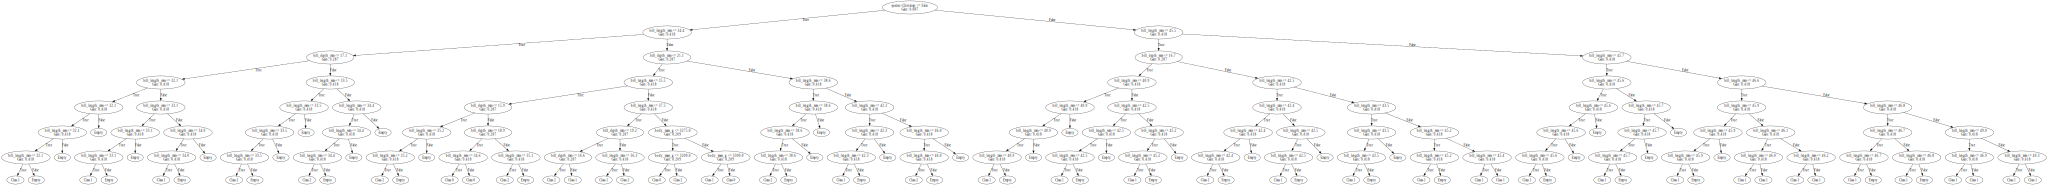

In [58]:
viz = tree_model.visualize()

viz

**Question: explain in our implementation, how we calculate feature importance and why?**

**[TODO: Write your observations here]**

Feature importance is determined by the differing impurity metrics from one node to another. If the impurity (measured either by entropy or gini index) is significantly lower in a following node, that would imply that the model got that much more "information" from that node split.

## Part 3: Random Forest

### Problem 6 (10 points)

Implement the bootstrap sampling and feature subsampling steps for random forest models in the `fit` function.

- Perform bootstrap sampling by randomly selecting samples with replacement from the training data.
- Perform feature subsampling by randomly selecting features without replacement.
- Create and train a decision tree classifier using the bootstrap sample and selected features.
- Append the trained tree and its selected feature indices to the list of trees.

### Problem 7 (10 points)

Implement the `predict` function.

- Make predictions using each trained tree with its selected features.
- Store the predictions from each tree in the predictions array.
- Perform majority voting to determine the final predictions.

In [59]:
from scipy.stats import mode
from sympy import N

class MyRandomForestClassifier:
    def __init__(self, n_estimators=100, max_features='sqrt', max_depth=None, random_state=None, feature_names=None):
        self.n_estimators = n_estimators  # Number of trees in the forest
        self.max_features = max_features  # The number of features to consider when looking for the best split
        self.max_depth = max_depth  # Maximum depth of the tree
        self.random_state = random_state  # Random seed
        self.feature_names = np.array(feature_names)
        self.trees = []  # List to store individual trees

    def fit(self, X, y):
        self.trees = []
        n_samples, n_features = X.shape

        # Determine the number of features to consider for each split
        if self.max_features == 'sqrt':
            self.max_features = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            self.max_features = int(np.log2(n_features))
        else:
            self.max_features = n_features

        # Set the random seed for reproducibility
        np.random.seed(self.random_state)

        for _ in range(self.n_estimators):
            # Problem 6: Implement the bootstrap sampling and feature subsampling steps
            # - Perform bootstrap sampling by randomly selecting samples with replacement from the training data
            # - Perform feature subsampling by randomly selecting features without replacement
            # - Create and train a decision tree classifier using the bootstrap sample and selected features
            # - Append the trained tree and its selected feature indices to the list of trees
            # Hint: Use np.random.choice to perform random sampling
            
            # START YOUR CODE HERE
            # TODO: Perform bootstrap sampling by randomly selecting samples with replacement from the training data
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            # indices = np.random.choice(n_samples, len(n_samples), True)
            # END YOUR CODE HERE

            X_sample = X[indices]
            y_sample = y[indices]

            # START YOUR CODE HERE
            # TODO: Perform feature subsampling by randomly selecting features without replacement
            features_indices = np.random.choice(n_features, size=n_features, replace=False)
            # END YOUR CODE HERE

            X_train_sampled = X_sample[:, features_indices]

            # Create and train a decision tree classifier using the bootstrap sample and selected features
            clf = MyDecisionTreeClassifier(max_depth=self.max_depth, gain_name='gini', feature_names=self.feature_names[features_indices])
            clf.fit(X_train_sampled, y_sample)
            self.trees.append((clf, features_indices))
            # END YOUR CODE HERE

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)), dtype=int)

        # Problem 7: Implement the prediction step
        # - Make predictions using each trained tree with its selected features
        # - Store the predictions from each tree in the predictions array
        # - Perform majority voting to determine the final predictions
        # Hint: Use the mode function from scipy.stats for majority voting
        
        # START YOUR CODE HERE
        for i, (tree, features_indices) in enumerate(self.trees):
            # TODO: Make predictions using each trained tree with its selected features
            predictions[:, i] = tree.predict(X[:, features_indices])

        # TODO: Perform majority voting to determine the final predictions
        final_predictions, _ = mode(predictions, axis=1)
        # END YOUR CODE HERE
        
        return final_predictions.flatten()

### Test cases

Now you can run the following cell to compare your random forest with the sklearn's implementation.

In [60]:
# Test case for Random Forest
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1])
rf = MyRandomForestClassifier(n_estimators=2, max_depth=1, feature_names=['X1', 'X2'])
rf.fit(X, y)
assert rf.predict(np.array([[0, 0]])) == [0], "Random Forest prediction test case failed."

In [61]:
from sklearn.ensemble import RandomForestClassifier

for n_estimators in [5, 10, 20, 50]:
    forest = MyRandomForestClassifier(max_depth=3, n_estimators=n_estimators, feature_names=list(data.columns))
    forest.fit(X_train, y_train)
    # Evaluate the classifier
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of My Forest: {n_estimators:.2f} {accuracy:.2f}")

    forest = RandomForestClassifier(max_depth=3, n_estimators=n_estimators)
    forest.fit(X_train, y_train)
    # Evaluate the classifier
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of sklearn Forest: {n_estimators:.2f} {accuracy:.2f}")

Accuracy of My Forest: 5.00 0.65
Accuracy of sklearn Forest: 5.00 0.62
Accuracy of My Forest: 10.00 0.62
Accuracy of sklearn Forest: 10.00 0.71
Accuracy of My Forest: 20.00 0.68
Accuracy of sklearn Forest: 20.00 0.68
Accuracy of My Forest: 50.00 0.65
Accuracy of sklearn Forest: 50.00 0.71


## Part 4: Mixture of Experts

### Problem 8 (10 points)

Implement the `GatingNetwork` class.
Its purpose is to learn and assign weights to each expert based on the input features. The GatingNetwork takes the same input as the experts and outputs a set of weights, one for each expert. These weights determine the contribution of each expert to the final output of the Mixture of Experts model.

### Problem 9 (10 points)

Implement the `MixtureOfExperts` class.
It combines multiple expert networks and a gating network to make predictions. The main idea is to divide the task among several specialized expert networks and let the gating network determine the contribution of each expert to the final output based on the input features.

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Expert(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Expert, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size, bias=True),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size, bias=True)
        )

    def forward(self, x):
        return self.network(x)

In [63]:
class GatingNetwork(nn.Module):
    def __init__(self, input_size, num_experts):
        super(GatingNetwork, self).__init__()
        # START YOUR CODE HERE
        # Implement the GatingNetwork class with the following specifications:
        # - The network should have one linear layer with input_size units and num_experts units.
        # - Use nn.Linear to define the layer.
        self.linear = nn.Linear(input_size, num_experts)
        # END YOUR CODE HERE

    def forward(self, x):
        # START YOUR CODE HERE
        # Implement the forward pass of the GatingNetwork class.
        # - Pass the input tensor through the linear layer defined in the constructor.
        # - Apply the softmax activation function to the output of the linear layer.
        # - Use F.softmax with dim=1 to apply softmax along the second dimension.
        output = self.linear(x)
        return F.softmax(output, dim=1)
        # END YOUR CODE HERE

In [64]:
# Test case for GatingNetwork
input_size = 4
num_experts = 3
gating_network = GatingNetwork(input_size, num_experts)
x = torch.randn(2, input_size)
gates = gating_network(x)
assert gates.shape == (2, num_experts), "GatingNetwork output shape test case failed."
assert torch.allclose(gates.sum(dim=1), torch.tensor([1.0, 1.0])), "GatingNetwork output sum test case failed."

In [65]:
class MixtureOfExperts(nn.Module):
    def __init__(self, num_experts, input_size, hidden_size, output_size):
        super(MixtureOfExperts, self).__init__()
        self.experts = nn.ModuleList([Expert(input_size, hidden_size, output_size) for _ in range(num_experts)])
        self.gating_network = GatingNetwork(input_size, num_experts)

    def get_gate(self, x):
        return self.gating_network(x)
        
    def forward(self, x):
        # Get weights for each expert from the gating network
        gates = self.gating_network(x)

        # Get outputs from each expert
        expert_outputs = [expert(x) for expert in self.experts]

        # Combine outputs from all experts
        # START YOUR CODE HERE
        # TODO: Implement the combination of expert outputs with the following steps:
        # - Convert the list of expert outputs to a tensor using torch.stack.
        #   The shape of the tensor should be [batch_size, num_experts, output_size].
        expert_outputs_tensor = torch.stack(expert_outputs, dim=1)
        # - Multiply the expert outputs tensor with the gating weights (unsqueezed to add an extra dimension).
        weighted_outputs = expert_outputs_tensor * gates.unsqueeze(-1)
        # - Sum the multiplied outputs along the second dimension (dim=1) to get the final output.
        #   The shape of the final output should be [batch_size, output_size].
        result = weighted_outputs.sum(dim=1)

        # END YOUR CODE HERE
        return result

In [66]:
# Test case for MixtureOfExperts
input_size = 4
hidden_size = 8
output_size = 2
num_experts = 3
moe = MixtureOfExperts(num_experts, input_size, hidden_size, output_size)
x = torch.randn(2, input_size)
output = moe(x)
assert output.shape == (2, output_size), "MixtureOfExperts output shape test case failed."

In [67]:
# Generate x values
X = np.linspace(-2, 2, 1000)
# Compute y values based on the given conditions
y = np.array([x if x > 0 else (x**3 + 5) for x in X]).reshape([-1,1])
X_train, X_test, y_train, y_test = train_test_split(X.reshape([-1,1]), y, test_size=0.1, random_state=42)

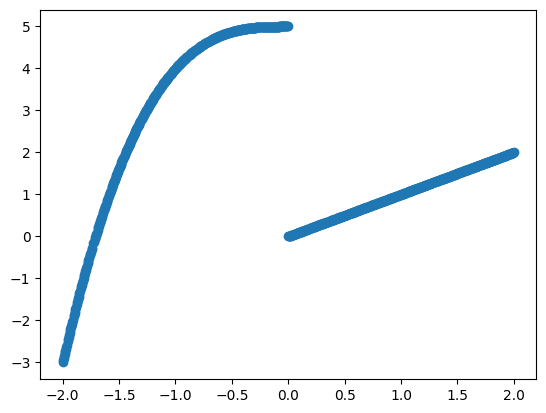

In [68]:
plt.scatter(X_train, y_train)
plt.show()

In [69]:
# Example usage:
input_size = 1
hidden_size = 128
output_size = 5
num_experts = 3

model = MixtureOfExperts(num_experts, input_size, hidden_size, output_size)
input_tensor = torch.randn(2, input_size)
output = model(input_tensor)
print(output)

tensor([[-0.2178,  0.2130,  0.0179,  0.1358,  0.0810],
        [-0.4296,  0.1337, -0.1839,  0.1889,  0.0557]], grad_fn=<SumBackward1>)


Epoch 1, Loss:  5.2288
Epoch 1, Eval Loss:  3.9915
Epoch 21, Loss:  0.3311
Epoch 21, Eval Loss:  0.3008
Epoch 41, Loss:  0.2443
Epoch 41, Eval Loss:  0.2122
Epoch 61, Loss:  0.1472
Epoch 61, Eval Loss:  0.1345
Epoch 81, Loss:  0.1068
Epoch 81, Eval Loss:  0.1152
Epoch 101, Loss:  0.0892
Epoch 101, Eval Loss:  0.1035
Epoch 121, Loss:  0.0818
Epoch 121, Eval Loss:  0.1058
Epoch 141, Loss:  0.0797
Epoch 141, Eval Loss:  0.0997
Epoch 161, Loss:  0.0689
Epoch 161, Eval Loss:  0.1015
Epoch 181, Loss:  0.0657
Epoch 181, Eval Loss:  0.0921
Epoch 201, Loss:  0.0670
Epoch 201, Eval Loss:  0.0939
Epoch 221, Loss:  0.0606
Epoch 221, Eval Loss:  0.0934
Epoch 241, Loss:  0.0592
Epoch 241, Eval Loss:  0.0835
Epoch 261, Loss:  0.0622
Epoch 261, Eval Loss:  0.0958
Epoch 281, Loss:  0.0567
Epoch 281, Eval Loss:  0.0884
Epoch 301, Loss:  0.0556
Epoch 301, Eval Loss:  0.0883
Epoch 321, Loss:  0.0571
Epoch 321, Eval Loss:  0.0847
Epoch 341, Loss:  0.0522
Epoch 341, Eval Loss:  0.0842
Epoch 361, Loss:  0.05

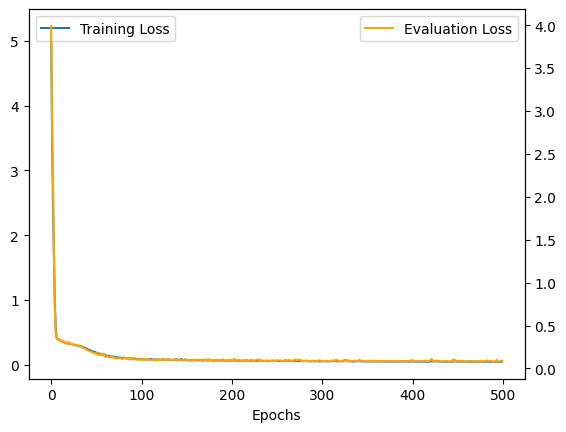

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt

# Convert data to PyTorch tensors
X_train_t = torch.FloatTensor(X_train.astype(float))
X_test_t = torch.FloatTensor(X_test.astype(float))
y_train_t = torch.FloatTensor(y_train)
y_test_t = torch.FloatTensor(y_test)

# Create DataLoader instances for batching
train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

# Define the Mixture of Experts model
input_size = X_train.shape[1]
output_size = 1
num_experts = 2  # Number of experts
hidden_size = 32  # Size of hidden layer in experts and gating network

model = MixtureOfExperts(num_experts, input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

train_losses = []
eval_losses = []

# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    eval_losses.append(total_loss / len(test_loader))
    if epoch % 20 == 0:
        print(f'Epoch {epoch+1}, Eval Loss: {total_loss / len(test_loader): .4f}')

# Train the model
model.train()
epochs = 500
for epoch in range(epochs):
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(train_loader))
    if epoch % 20 == 0:
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader): .4f}')
    evaluate(model, test_loader)

# Plot the loss and accuracy
fig, ax1 = plt.subplots()
ax1.plot(train_losses, label='Training Loss')
ax1.set_xlabel('Epochs')
ax2 = ax1.twinx()
ax2.plot(eval_losses, label='Evaluation Loss', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

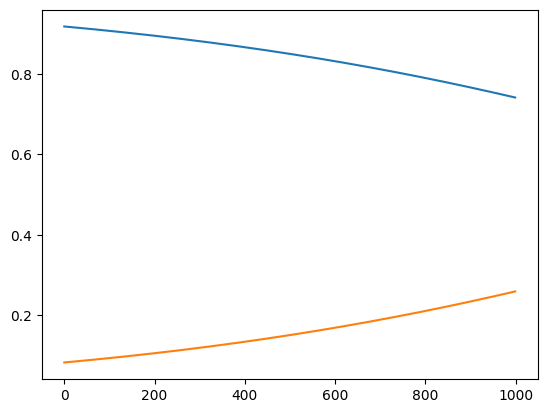

In [71]:
gates_prob = model.gating_network(torch.FloatTensor(X).view([-1,1])).detach().numpy()

plt.plot(gates_prob[:,0])
plt.plot(gates_prob[:,1])
plt.show()

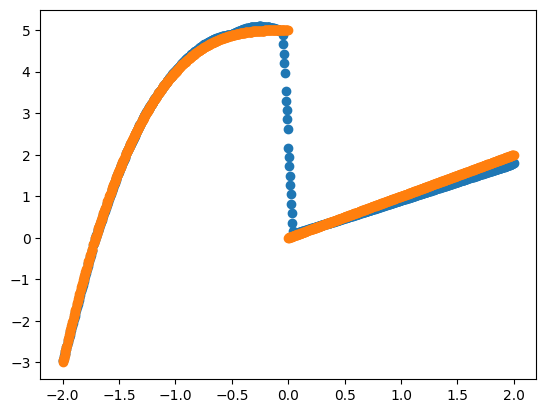

In [72]:
plt.scatter(X_train[:,0], model(X_train_t).reshape(-1).detach().numpy())
plt.scatter(X_train, y_train)
plt.show()

### Problem 10 (10 points)
Compare the performance of the Mixture of Experts (MoE) model and a Sparse Mixture of Experts (SMoE) model.
Instructions:
- Implement a Sparse Mixture of Experts (SMoE) model based on the paper "Outrageously Large Neural Networks: The Sparsely-Gated Mixture-of-Experts Layer" (https://arxiv.org/abs/1701.06538, Section 2.1).
- Modify the Mixture of Experts (MoE) model to include the sparsity parameter `k`.
- Train and evaluate both the MoE and SMoE models using the same training loop and evaluation function.
- Compare the performance of the MoE and SMoE models.
- Write your observations in the comments below.

Hints:
- In the SMoE model, during training, add tunable Gaussian noise to the gating weights before applying the softmax function.
    $$
    \begin{align}
    \mathbf{n} & = \mathbf{x} \mathbf{W}_n, \\
    \mathbf{\sigma} & = \text{softplus}(\mathbf{n}) + \epsilon, \\
    \mathbf{l} & = \mathbf{c} + \mathcal{N}(0, \mathbf{\sigma}^2),
    \end{align}
    $$
    where $\mathbf{n}$ is the vector of raw noise standard deviations, $\mathbf{W}_n$ is the weight matrix for the noise gate, $\mathbf{\sigma}$ is the vector of noise standard deviations, $\epsilon$ is a small constant for numerical stability, and $\mathbf{l}$ is the vector of noisy logits.
- The top-k gating mechanism selects the k experts with the highest noisy logits:
    $$
    \begin{align}
    \mathbf{t}, \mathbf{i} & = \text{topk}(\mathbf{l}, k+1), \\
    \mathbf{t}_k & = \mathbf{t}_{:k}, \\
    \mathbf{i}_k & = \mathbf{i}_{:k},
    \end{align}
    $$
    where $\mathbf{t}$ is the vector of top-k+1 logits, $\mathbf{i}$ is the vector of top-k+1 indices, $\mathbf{t}_k$ is the vector of top-k logits, and $\mathbf{i}_k$ is the vector of top-k indices.

- The gating weights are obtained by applying the softmax function to the top-k logits:
    $$
    \begin{align}
    \mathbf{g}_k & = \text{softmax}(\mathbf{t}_k), \\
    \mathbf{g} & = \text{scatter}(\mathbf{0}, \mathbf{i}_k, \mathbf{g}_k),
    \end{align}
    $$
    where $\mathbf{g}_k$ is the vector of top-k gating weights, and $\mathbf{g}$ is the sparse vector of gating weights with non-zero values at the top-k indices.

When writing your observations, remember to include the following:
- Compare the training and evaluation results of the MoE and SMoE models.
- Discuss any differences in performance, convergence, or computational efficiency between the two models.
- Provide insights on how the sparsity and noisy gating mechanisms in the SMoE model affect its performance compared to the standard MoE model.
- Analyze the impact of the sparsity parameter k on the performance and efficiency of the SMoE model.

In [75]:
class SparseGatingNetwork(nn.Module):
    def __init__(self, input_size, num_experts, k, noise_epsilon=1e-3):
        super(SparseGatingNetwork, self).__init__()
        self.gate = nn.Linear(input_size, num_experts)
        self.noise_gate = nn.Linear(input_size, num_experts)
        self.k = k
        self.noise_epsilon = noise_epsilon

    def forward(self, x):
        # Problem 10: Implement Noisy Top-K Gating
        # - Add tunable Gaussian noise to the gating weights before applying the softmax function.
        # - Keep only the top k values, setting the rest to -∞.
        # - Use the provided equations as a reference.
        # Hints:
        # - Use torch.randn_like to generate standard normal noise with the same shape as the gating weights.
        # - Use F.softplus to apply the softplus function to the noise weights.
        # - Use torch.topk to find the top k values and their indices.
        # - Create a new tensor with -∞ values and update the top k values using the indices.

        # START YOUR CODE HERE
        gating_weights = self.gate(x)
        noise_weights = self.noise_gate(x)

        # Add tunable Gaussian noise to the gating weights
        noisy_gating_weights = gating_weights + torch.randn_like(gating_weights) * F.softplus(noise_weights + self.noise_epsilon)

        # Get the top-k values and their indices
        top_values, top_indices = torch.topk(noisy_gating_weights, self.k, dim=1)

        # Create a new tensor with -inf values
        gates = torch.full_like(noisy_gating_weights, float('-inf'))

        # Update the top-k values in the new tensor
        gates = gates.scatter(1, top_indices, top_values)

        # Apply softmax to get the final gating weights
        gates = F.softmax(gates, dim=1)
        # END YOUR CODE HERE
        return gates

In [79]:
class MixtureOfExperts(nn.Module):
    def __init__(self, num_experts, input_size, hidden_size, output_size, k, noisy_gating=True):
        super(MixtureOfExperts, self).__init__()
        self.experts = nn.ModuleList([Expert(input_size, hidden_size, output_size) for _ in range(num_experts)])
        self.gating_network = SparseGatingNetwork(input_size, num_experts, k, noisy_gating)

    def forward(self, x):
        # START YOUR CODE HERE
        # TODO: Copy your code from Problem 9
        output = self.gating_network(x)
        return F.softmax(output, dim=1)
        # END YOUR CODE HERE

In [80]:
# Test case for SparseGatingNetwork
input_size = 4
num_experts = 5
k = 3
sparse_gating_network = SparseGatingNetwork(input_size, num_experts, k)
x = torch.randn(2, input_size)
gates = sparse_gating_network(x)
assert gates.shape == (2, num_experts), "SparseGatingNetwork output shape test case failed."
assert torch.allclose(gates.sum(dim=1), torch.tensor([1.0, 1.0])), "SparseGatingNetwork output sum test case failed."
assert (gates > 0).sum(dim=1).max() <= k, "SparseGatingNetwork top-k test case failed."

In [81]:
num_experts = 5
input_size = 10
hidden_size = 20
output_size = 8
k = 3

model = MixtureOfExperts(num_experts, input_size, hidden_size, output_size, k)

batch_size = 4
x = torch.randn(batch_size, input_size)

output = model(x)
print(output.shape) 

torch.Size([4, 5])


**[TODO: Write your observations here]**